# Exercise 3: Perceptron

## 3.1 Perceptron for data classification

In order to demonstrate the main concepts behind the perceptron, we have to define input and output data. We will use $N$ two-dimensional vectors $\mathbf{a}_i$ as input data organized in a $2\times N$ matrix $\mathbf{A}$ (two rows and $N$ columns).

$\mathbf{A}=\begin{bmatrix}
    a_{x_1} & a_{x_2} & \dots & a_{x_N}\\
    a_{y_1} & a_{y_2} & \dots & a_{y_N}
\end{bmatrix}$

Here, $N$ is the number of vectors and $a_{x_i}$, $a_{y_i}$ are the $x$ and $y$ coordinates of $i$-th vector. In this example we will demonstrate how to classify vectors in two classes. In this case, each vector can belong to only one of two possible classes, for example $C_0$ and $C_1$. Classes of each examples are defined using a matrix \mathbf{C}, whose dimensions are $1\times N$ defined as follows:

$\mathbf{C}=\left[c_1, c_2, \dots, c_N\right]$

Each element $c_i$ has value $0$ if vector $\mathbf{a}_i$ belongs to class $C_0$ and has value $1$ if vector belongs to class $C_1$.

### 3.1.1 Classification of linearly separable examples in 2D space

In this experiment we will show how to use the perceptron in order to classify a vector in two linearly separable classes. We will use the following vectors as input vectors:

In [31]:
import numpy as np

a1=np.array([[1, 1]]).T
a2=np.array([[1, 1]]).T
a3=np.array([[2, 0]]).T
a4=np.array([[1, 2]]).T
a5=np.array([[2, 1]]).T

Here, vectors $\mathbf{a}_1$, $\mathbf{a}_2$ and $\mathbf{a}_3$ belong to class $C_0$ and other vectors belong to class $C_1$.

**Tasks**

1. Form the matrices $\mathbf{A}$ and $\mathbf{C}$ as explained.
2. Plot the vectors. Vectors belonging to the same class have the same color in the plot.

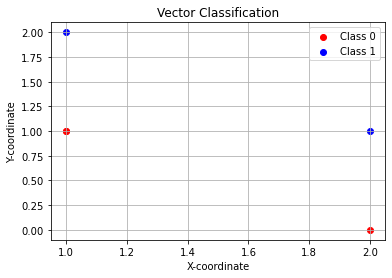

In [32]:
# Write your code here
import matplotlib.pyplot as plt

A =np.hstack((a1,a2,a3,a4,a5))

C = np.array([[0,0,0,1,1]])

C_pom = C.flatten()
class_0_indices = np.where(C_pom == 0)[0]
class_1_indices = np.where(C_pom == 1)[0]

plt.scatter(A[0, class_0_indices], A[1, class_0_indices], color='red', label='Class 0')
plt.scatter(A[0, class_1_indices], A[1, class_1_indices], color='blue', label='Class 1')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.title('Vector Classification')
plt.grid(True)
plt.show()

You can initialize the perceptron as follows:

In [33]:
def initp(data, labels):
    return -0.5+np.random.rand(labels.shape[0], data.shape[0]+1)

W=initp(A, C)

Here, vector $\mathbf{W}$ is the vector with neural network weights. The first column of $\mathbf{W}$ represents the threshold value. The hyperplane can be visualized using following command:

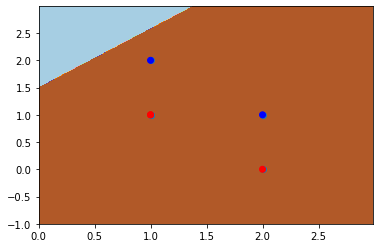

In [34]:
def predict(W, A):
    return (W@np.vstack([-np.ones((1, A.shape[1])), A])>=0).astype(int)

def plot(W, A):
    x_start, x_end=A[0, :].min()-1, A[0, :].max()+1
    y_start, y_end=A[1, :].min()-1, A[1, :].max()+1

    xx, yy=np.meshgrid(np.arange(x_start, x_end, 0.01), np.arange(y_start, y_end, 0.01))
    grid=np.vstack([xx.ravel(), yy.ravel()])

    Z=predict(W, grid).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(A[0, :], A[1, :])

    plt.scatter(A[0, :], A[1, :], color=[["red", "blue"][C[0, i]] for i in range(A.shape[1])])
    plt.show()

plot(W, A)

Previously initialized perceptron can be trained by calling the function *trainlms_p* until correct (or satisfactory) segmentation (division) of the plain is achieved:

In [35]:
def trainlms_p(ni, x, d, W, max_epoch):
    w=W.copy()

    n=0
    errors=[]
    while (n<max_epoch):
        n+=1
        y=predict(w, x)
        e=d-y
        w+=ni*e@np.vstack([-np.ones((1, x.shape[1])), x]).T
        error=np.sum(np.square(e))
        errors.append(error)
        if (error<0.02):
            break
    return w, errors

**Tasks**

1. Plot the plane and positions of last vectors with the classification plane in two cases: before and after training. Are classes $C_1$ and $C_2$ correctly separated in both cases?
2. Show the segmentation error with regards to training iteration.
3. Think of an experiment where you will use the perceptron to find the border in 2D space and train the required perceptron.
4. Think of an experiment where you will use the perceptron to find the border in 3D space and train the required perceptron.

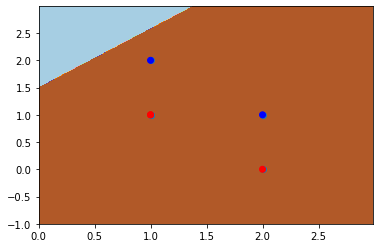

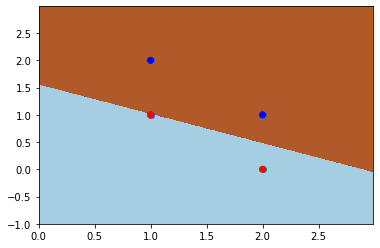

Prediction for vector c: [[0 0 0 1 1]]


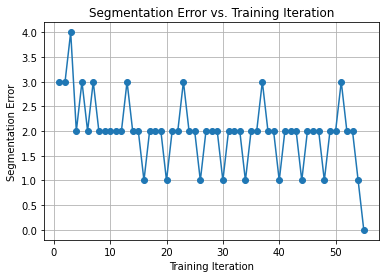

In [36]:
plot(W, A)
#1. task
# Train the perceptron
max_epoch = 100
ni = 0.1
trained_W, errors = trainlms_p(ni, A, C, W, max_epoch)

plot(trained_W, A)

c_predicted = predict(trained_W, A)

print("Prediction for vector c:", c_predicted)

#2. task
# Plot the segmentation error with respect to training iteration
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Training Iteration')
plt.ylabel('Segmentation Error')
plt.title('Segmentation Error vs. Training Iteration')
plt.grid(True)
plt.show()

Before training the perceptron, classes C1 and C2 were not correctly separated, but after training the perceptron using the LMS algorithm, classes C1 and C2 are correctly separated.

One experiment where I can use the perceptron to find the border in 2D space is to create a simple email spam classification.

Also experiment where I can use the perceptron to find the border in 3D space and train required perceptron is anomaly detection in manufacturing where manufacturing process is using 3D sensor data.

### 3.1.2 Linearly inseparable case in 2D

In this experiment we will try to train a perceptron for two linearly inseparable classes. To be more precise, we will try to solve the logical XOR function problem. Input vectors ai will represent the function inputs and classes $C_0$ and $C_1$ will represent the function values:

In [37]:
A=np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
C=np.array([[0, 1, 1, 0]])

**Tasks**

1. Use the same training procedure from the first experiment. Plot the obtained results (i.e. plot the input vectors before and after the training phase in the same window). Plot the error as well.
2. Did perceptron learn to solve the XOR problem? Explain why.

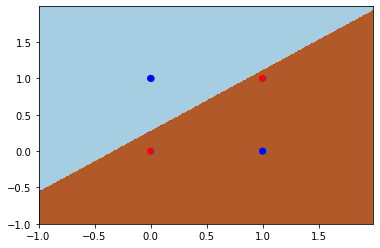

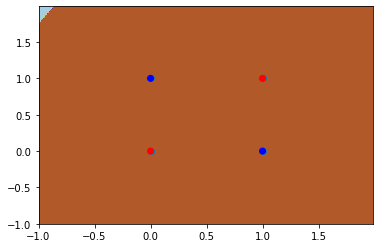

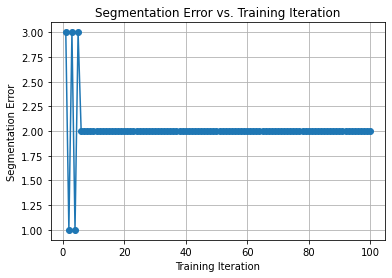

In [39]:
# Write your code here
W=initp(A, C)
max_epoch = 100
ni = 0.1

plot(W,A)

trained_W_1_2, error_1_2 = trainlms_p(ni, A, C, W, max_epoch)

plot(trained_W_1_2, A)

plt.plot(range(1, len(error_1_2) + 1), error_1_2, marker='o')
plt.xlabel('Training Iteration')
plt.ylabel('Segmentation Error')
plt.title('Segmentation Error vs. Training Iteration')
plt.grid(True)
plt.show()

No, the perceptron cannot learn to solve the XOR problem as plotted on first graph. The XOR problem is not linearly separable, and a perceptron is a linear classifier. It can only learn to separate data with a linear decision boundary, which is insufficient for solving the XOR problem.

### 3.1.3 Classification of linearly separable examples in 3D space

This experiment shows how to classify examples in 3D space. Input vectors are three dimensional and belong to 2 classes which are linearly separable. Input vectors are:

In [40]:
a1=np.array([[0, 0, 0]]).T
a2=np.array([[0, 0, 1]]).T
a3=np.array([[0, 1, 0]]).T
a4=np.array([[0, 1, 1]]).T
a5=np.array([[1, 0, 0]]).T

A=np.hstack([a1, a2, a3, a4, a5])
C=np.array([[0, 1, 0, 0, 1]])

Here, vectors $\mathbf{a}_1$, $\mathbf{a}_3$ and $\mathbf{a}_4$ belong to class $C_0$ and other vectors belong to class $C_1$.

**Tasks**

1. Repeat the learning procedure from 3.1.1. and show the obtained results with plot of the error.
2. Change the vector classes until classes $C_0$ and $C_1$ become linearly inseparable. When does this happen?

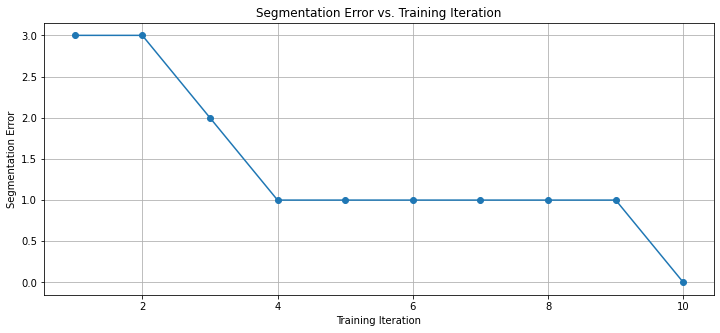

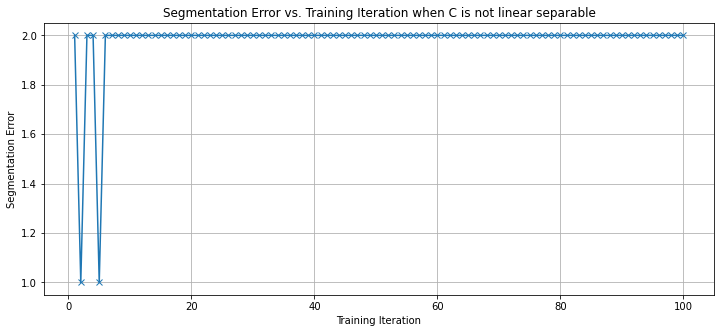

In [41]:
# Write your code here
# Train the perceptron
W = initp(A,C)
max_epoch = 100
ni = 0.1
trained_W_1_3, errors_1_3 = trainlms_p(ni, A, C, W, max_epoch)

plt.figure(figsize=(12, 5))
plt.plot(range(1, len(errors_1_3) + 1), errors_1_3, marker='o')
plt.xlabel('Training Iteration')
plt.ylabel('Segmentation Error')
plt.title('Segmentation Error vs. Training Iteration')
plt.grid(True)
plt.show()

# Swap class labels to make them inseparable
C_swap = np.array([[0, 1, 1, 0, 1]])
W = initp(A,C_swap)
trained_W_1_3_swap, errors_1_3_swap = trainlms_p(ni, A, C_swap, W, max_epoch)

plt.figure(figsize=(12, 5))
plt.plot(range(1, len(errors_1_3_swap) + 1), errors_1_3_swap, marker='x')
plt.xlabel('Training Iteration')
plt.ylabel('Segmentation Error')
plt.title('Segmentation Error vs. Training Iteration when C is not linear separable')
plt.grid(True)
plt.show()


𝐶0 and 𝐶1 become linearly inseparable when training error has a larger training error and does not change as number of iteration increases, indicating that the perceptron cannot perfectly classify the data.

## 3.2 Classification of examples with Gaussian distribution

The second part of this exercise tries to show how to classify examples with Gaussian distribution, which can be typically found in real life problems.

Suppose we have two classes of 2D vectors, where each class represents the realization of the random vector with Gaussian distribution. We will set the mean value and standard deviation of the first class to $E(C_0)=(10, 10)$ and $S(C_0)=2.5$ for each of the components. The second class will have the expected value $E(C_1)=(20, 5)$ and standard deviation $S(C_1)=2$. Create 100 vectors for each class as follows:

In [11]:
A1=np.random.normal((10, 10), (2.5, 2.5), size=(100,2)).T
A2=np.random.normal((20, 5), (2, 2), size=(100,2)).T

After this step we have to construct the matrix $\mathbf{A}$ containing vectors $\mathbf{A}_1$ and $\mathbf{A}_2$. We have to form the vector $\mathbf{C}$ which says that first that 100 elements belong to class $C_0$ and other elements belong to class $C_1$:

In [12]:
A=np.hstack([A1, A2])
C=np.hstack([np.zeros((1,100)), np.ones((1, 100))]).astype(int)

**Tasks**

1. Repeat the training procedure from the first part of the exercise. Plot the obtained results.
2. How many examples were misclassified?
3. If the input vector is given as $\mathbf{a}_i$=(10,3) where would we classify this example?

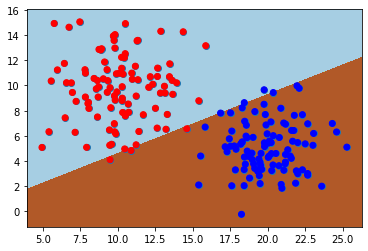

Number of misclassified examples: 6
Input vector (10, 3) is classified as Class C1


In [13]:
# Write your code here
# Write your code here
W=initp(A, C)
max_epoch = 100
ni = 0.1
trained_W_3_2, error_3_2 = trainlms_p(ni, A, C, W, max_epoch)

plot(trained_W_3_2, A)

# Count the misclassified examples

c_predicted_3_2 = predict(trained_W_3_2, A)
misclassified = np.sum(np.abs(C - c_predicted_3_2))
print("Number of misclassified examples:", misclassified)

ai = np.array([[10, 3]]).T

# Classify the input vector using the trained perceptron
classification = predict(trained_W_3_2, ai)

if classification == 0:
    print("Input vector (10, 3) is classified as Class C0")
else:
    print("Input vector (10, 3) is classified as Class C1")

5 examples were misclassified.

Input vector ai=(10, 3) is classified as Class C1

### 3.3.1 Classification of examples using two perceptrons

The third part of the exercise shows how to use more than one perceptron in order to classify input vectors in larger number of classes. In Figure 4 we can see a network with two perceptrons which can be used in order to classify the examples in four linearly inseparable classes.

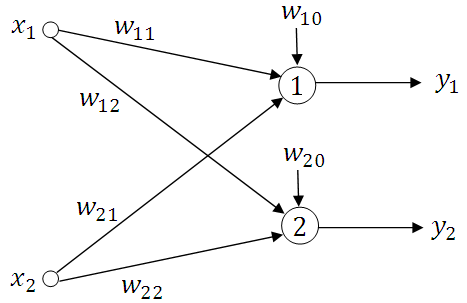

Figure 4. Two perceptrons for classification in four classes (outputs are binary coded)

Suppose we have 10 2D input vectors defined with matrix $\mathbf{A}$ where each column of the matrix represents one input vector:

In [14]:
A=np.array([[0.1, 0.7, 0.8, 0.8, 1.0, 0.3, 0.0, -0.3, -0.5, -1.5], [1.2, 1.8, 1.6, 0.6, 0.8, 0.5, 0.2, 0.8, -1.5, -1.3]])

Matrix $\mathbf{C}$ is used to define in which class each input vector belongs to:

In [15]:
C=np.array([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]]);

Each column of the matrix $\mathbf{C}$ is a 2D vector, where each two bits represent the binary coded class value for each input vector. Using two bits we can binary code four different values, which represent the class names: $C_0$, $C_1$, $C_2$, $C_3$. This network is trained using the same procedure used for the network with only one perceptron.

**Tasks**

1. Train the network. Plot the obtained results with plot of the error.

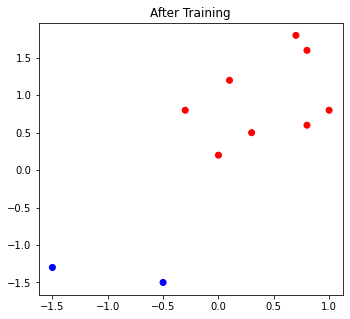

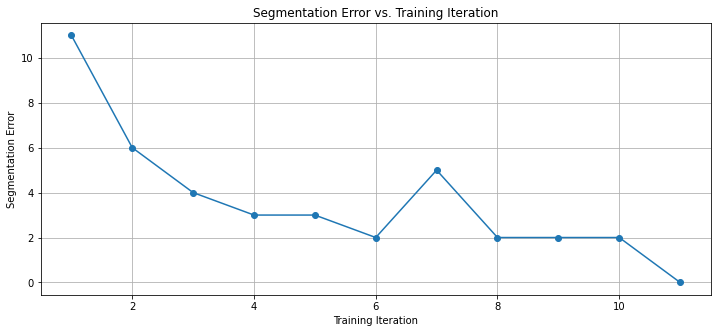

In [16]:
# Write your code here
W = initp(A, C)

trained_W_3_3, error_3_3 = trainlms_p(ni, A, C, W, max_epoch)

# Plot the obtained results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
c_predicted = predict(trained_W_3_3, A)
plt.scatter(A[0, :], A[1, :], color=[["red", "blue", "green", "purple"][np.argmax(c_predicted[:, i])] for i in range(A.shape[1])])
plt.title('After Training')

plt.show()

# Plot the segmentation error with respect to training iteration
plt.figure(figsize=(12, 5))
plt.plot(range(1, len(error_3_3) + 1), error_3_3, marker='o')
plt.xlabel('Training Iteration')
plt.ylabel('Segmentation Error')
plt.title('Segmentation Error vs. Training Iteration')
plt.grid(True)

# Exercise 4: LMS algorithm for stock price prediction

## 4.1 Introduction

In this exercise the *trainlms* function given below will be used.

**Tasks**

1. What does the function *trainlms* do?

In [17]:
def predict(W, A):
    return W@np.vstack([-np.ones((1, A.shape[1])), A])

def trainlms(ni, x, d, W, max_epoch):
    w=W.copy()

    n=0
    errors=[]
    while (n<max_epoch):
        n+=1
        y=predict(w, x)
        e=d-y
        w+=ni*e@np.vstack([-np.ones((1, x.shape[1])), x]).T
        error=np.sum(np.square(e))
        errors.append(error)
        if (error<0.02):
            break
    return w, errors

Trainlms function is used to train a perceptron using the LMS algorithm. It calculates and returns the predicted output by performing a linear combination of the weights and input vectors. It also returns all errors that occured in each training iteration.

## 4.2 Stock price movement

Download stock.txt file from the course web pages.

If your are using Google Colaboratory instead of running the notebook locally, upload the file on your Google Drive and run the following cell:

In [18]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In this experiment we will use the LMS algorithm in order to predict the stock price for a given stock. Load the data from file *stock.txt* into variable *data*. Numbers (elements of vector *data*) show the movement of average daily price of the given share in time. Plot the variable *data* using the following commands:

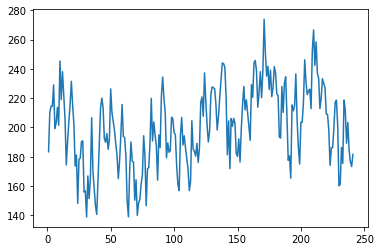

In [19]:
# Loading data from a file for a local notebook
#data=np.loadtxt("stock.txt", delimiter=",")

# Loading data from a file for a Colab notebook
data=np.loadtxt("stock.txt", delimiter=",")

import matplotlib.pyplot as plt
plt.plot(range(1, data.shape[0]+1), data)
plt.show()

The goal of this exercise is to use several (let us say $N$) previous share prices in order to predict the share price for today. This is useful because we can buy or sell the price before its price rises or falls and in that way increase our profit or lower our loss. The first step is to find the input-output pairs, which will be used on order to train our network. The size of this set will be defined using variable $i$. Our inputs will be vectors $\mathbf{a}_i$, which we put in matrix $\mathbf{A}$. Outputs are scalar values, which we put in vector $y$.

**Tasks**

1. Write the function *memory*, which for given day in the year (index of the variable *data*) constructs a column vector $\mathbf{a}$ whose elements represent the prices for last *N* days but without the price for today.
2. Using the function *memory* write a function *memorize*, which for given inputs (*data*, *day*, *N*, *i*) constructs the matrix $\mathbf{A}$ in which each column vector represents the $\mathbf{a}_i$ for the previous day. So, matrix $\mathbf{A}$ memorizes $i$ memories which we will use in order to train our network.

In [20]:
# Write your code here
def memory(data, day, N):
    a = data[day - N:day]  # Extract prices for the last N days (excluding today)
    return a.reshape(-1, 1)  # Reshape to a column vector

def memorize(data, day, N, i):
    A = np.zeros((N, i))  # Initialize the matrix A with zeros

    for j in range(i):
        a = memory(data, day - j - 1, N)  # Get the memory for the j-th day
        if a is not None:
            A[:, j] = a.flatten()  # Store the memory in the j-th column of A

    return A

Construct the matrix $\mathbf{A}$ using the command:

In [21]:
day=151
N=70
i=50
A=memorize(data, day, N, i)
print(A.shape)
print(A)

(70, 50)
[[188.95 172.52 171.8  ... 165.21 151.45 166.83]
 [219.83 188.95 172.52 ... 206.64 165.21 151.45]
 [190.75 219.83 188.95 ... 170.25 206.64 165.21]
 ...
 [202.9  206.16 200.78 ... 194.92 196.47 205.8 ]
 [182.28 202.9  206.16 ... 174.1  194.92 196.47]
 [180.14 182.28 202.9  ... 161.27 174.1  194.92]]


The output vector is constructed using the command:

In [22]:
y=np.array([data[day-i+1:day+1]])

We initialize the perceptron as follows:

In [23]:
def initp(data, labels):
    return -0.5+np.random.rand(labels.shape[0], data.shape[0]+1)

W=initp(A, y)

We train the perceptron using the command:

In [24]:
ni=1e-8
max_num_iter=10000

W1, errors=trainlms(ni, A, y, W, max_num_iter)

Weights of the network are memorized in the matrix $\mathbf{W}_1$. Variable *ni* should be experimentally found. Train the network for different values of *i*, *N*, *max_num_iter*. We can visualize the output of the network on the training data using the following command:

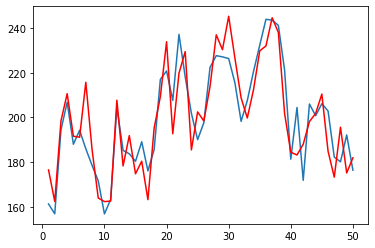

In [25]:
p=predict(W1, A)

plt.plot(range(1, y[0].shape[0]+1), y[0])
plt.plot(range(1, p[0].shape[0]+1), p[0], c="red")
plt.show()

Here, the blue color shows the predicted values and the red color shows the real outputs.

**Tasks**

1. Memorize different weight matrices ($\mathbf{W}_1$, $\mathbf{W}_2$...) with different combinations of following parameters *i*=30, 50 or 100; *N*=20, 50 or 80; *max_num_iter*=10000, 50000 or 500000. (Choose 6 different combinations.) For selected parameter combinations show the obtained predictions with real values. Comment the obtained results.

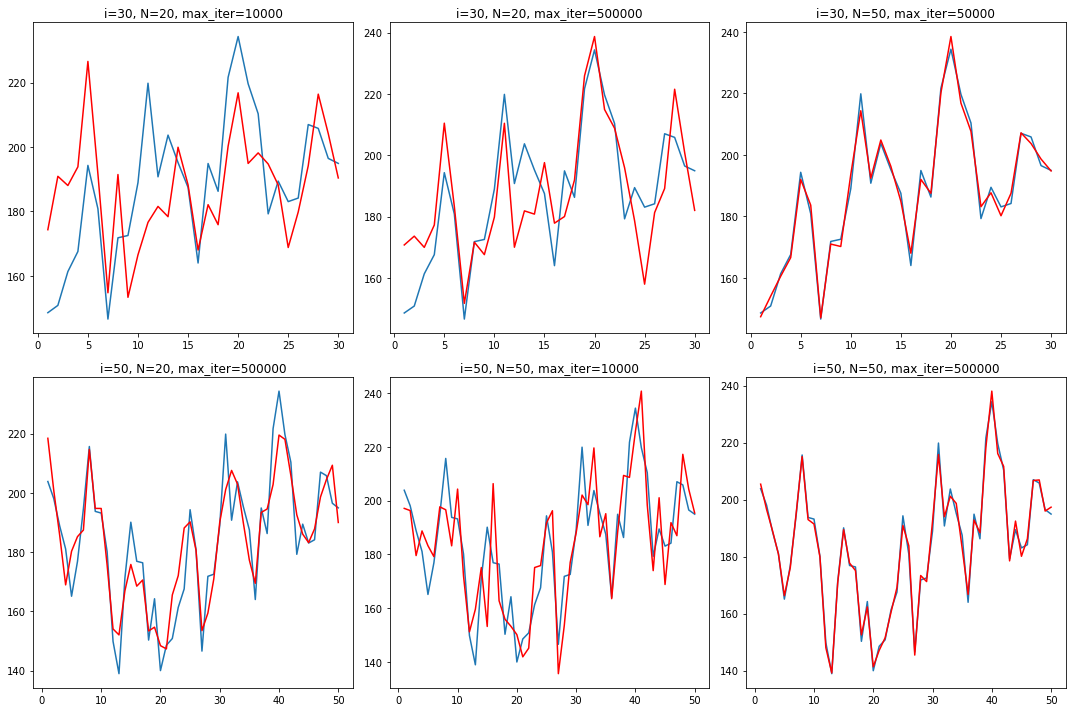

In [26]:
# Write your code here
day=100
combinations = [(30, 20, 10000) , (30, 20, 500000), (30, 50, 50000), 
                (50, 20, 500000), (50, 50, 10000), (50, 50, 500000)]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, (i_value, N, max_num_iter) in enumerate(combinations):
    A = memorize(data, day, N, i_value)
    y=np.array([data[day-i_value+1:day+1]])
    W = initp(A, y)  
    
    trained_W, errors = trainlms_p(ni, A, y, W, max_num_iter)  

    
    p=predict(trained_W, A)

    
    row = i // 3
    col = i % 3
    axs[row, col].plot(range(1, y[0].shape[0] + 1), y[0])
    axs[row, col].plot(range(1, p[0].shape[0] + 1), p[0], c="red")
    axs[row, col].set_title(f"i={i_value}, N={N}, max_iter={max_num_iter}")


plt.tight_layout()
plt.show()


Different combinations of i, N, and max_num_iter have different impact on prediction. Larger i values result in more accurate predictions. Larger N values can lead to a lag in predictions. Higher max_num_iter values generally result in better-fitting predictions. I reached these conclusions by looking at the first graph (i=30, N=20, max_iter=10000) and the sixth graph (i=50, N=50, max_iter=50000), and we can see how predictions are more accurate in the sixth graph compared to the first. Also, looking at the fifth graph (i=50, N=50, max_iter=10000) and the sixth graph (i=50, N=50, max_iter=50000), we can see how the number of iterations in training plays a significant role because in the sixth graph, the model has better predictions.

If we do not use any intelligence for stock price prediction and we assume the price will be (almost) the same tomorrow, the error we make is:

In [27]:
a=data[day:day+1]          # price today - we assume the same price tomorrow
y=data[day+1:day+2]        # the real price tomorrow
err_oo=np.sum(np.abs(y-a)) # error
print(err_oo)

20.819999999999993


If we use the network trained on previous days to predict the price for tomorrow, the error is as follows:

In [28]:
ni=1e-8
max_num_iter=10000

W1, errors=trainlms(ni, A, y, W, max_num_iter)
p=predict(W1, memorize(data, day+1, N, 1))
err_nn=np.sum(np.abs(y-p))
print(err_nn)

4.887387071535471


If we trade each day with the given stock, our error can be easily measured. Our potential profit can be calculated as follows:

In [29]:
profit=err_oo-err_nn
print(profit)

15.932612928464522


To predict the price of the day after tomorrow, we could use the same network or we could train the network from scratch by also using the data of the day before the day after tomorrow i.e. by using the data of tomorrow. Which way would be better?

**Tasks**

1. Create a table in which you will show the obtained profit levels depending on the parameters used (*i*, *N*, and *max_num_iter*). For of these parameter triplets the profit should be the sum of the profit for every possible *day* for which training data defined by *i* and *N* exists.

In [30]:
import pandas as pd

# Define the parameter combinations
combinations = [(30, 20, 10000), (30, 20, 500000), (30, 50, 50000),
                (50, 20, 500000), (50, 50, 10000), (50, 50, 500000)]

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=["i", "N", "max_num_iter", "profit"])

for i, (i_value, N, max_num_iter) in enumerate(combinations):
    A = memorize(data, day, N, i_value)
    y = np.array([data[day - i_value + 1:day + 1]])
    W = initp(A, y)
    trained_W, errors = trainlms_p(ni, A, y, W, max_num_iter)
    p = predict(trained_W, A)

    # Calculate the profit
    profit = np.sum(np.abs(y - p))

    # Append the results to a temporary DataFrame
    temp_df = pd.DataFrame({"i": [i_value], "N": [N], "max_num_iter": [max_num_iter], "profit": [profit]})
    
    # Concatenate the temporary DataFrame with the results DataFrame
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Display the results
print(results_df)


    i   N max_num_iter      profit
0  30  20        10000  451.272677
1  30  20       500000  333.968689
2  30  50        50000   40.502697
3  50  20       500000  371.395227
4  50  50        10000  486.335249
5  50  50       500000   88.724223


The better approach for predicting the price of the day after tomorrow would be to use the same network that has already been trained on the previous data. Using the same network leverages the learned patterns and relationships in the stock price data, which are expected to be more stable and generalizable than training a new network from scratch with additional data.